# 03 — Decomposition, ACF & PACF

Decompose a series (STL), and inspect ACF/PACF for model hints.


In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
idx = pd.date_range("2015-01-01", periods=120, freq="MS")
rng = np.random.default_rng(123)
trend = np.linspace(30, 130, len(idx))
seasonal = 12*np.sin(2*np.pi*idx.month/12)
noise = rng.normal(0, 4, len(idx))
ts = pd.Series(trend + seasonal + noise, index=idx, name="value")

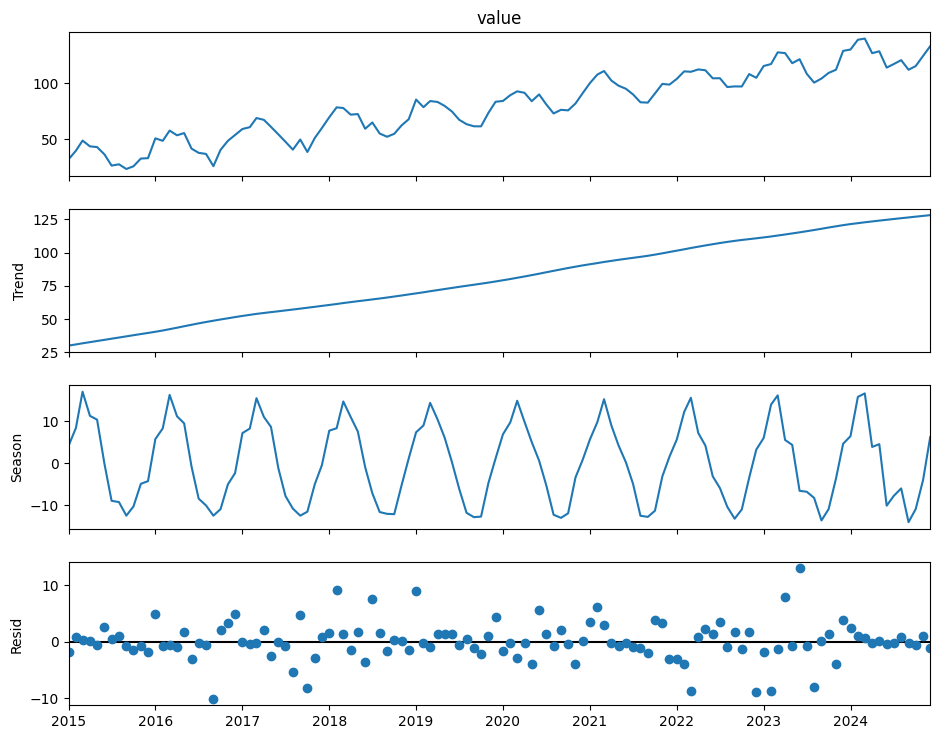

In [3]:
# STL decomposition
stl = STL(ts, period=12, robust=True).fit()
fig = stl.plot()
fig.set_size_inches(10,8)
plt.show()

In [4]:
# ACF and PACF of differenced series (to encourage stationarity)
diff = ts.diff().dropna()

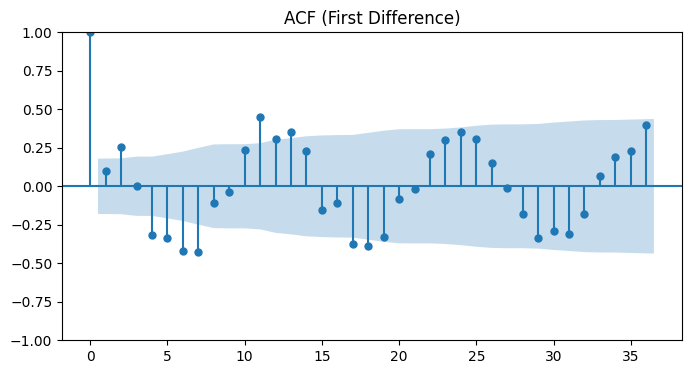

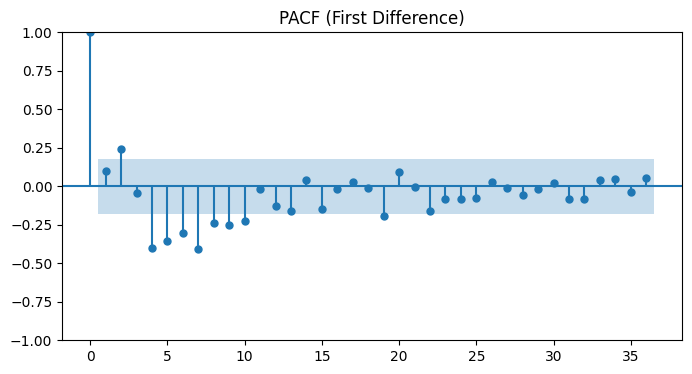

In [5]:
# ACF
fig1 = plt.figure(figsize=(8,4))
plot_acf(diff, ax=plt.gca(), lags=36)
plt.title("ACF (First Difference)")
plt.show()

# PACF
fig2 = plt.figure(figsize=(8,4))
plot_pacf(diff, ax=plt.gca(), lags=36, method="ywm")
plt.title("PACF (First Difference)")
plt.show()


**Rules of thumb:**
- ACF sharp cutoff → MA(q). PACF sharp cutoff → AR(p). Both tailing → ARMA.
- Seasonality shows spikes at multiples of period (e.g., 12 for monthly).

### 🔹 ACF

* Significant negative spikes at early lags (around 3–6):
→ This often hints at an AR (autoregressive) component.

* Repeating spikes around multiples of 12 (lag ~12, 24, etc.):
→ Strong indicator of seasonality with period 12 (likely monthly data).

* Slow decay across lags after seasonal points:
→ Suggests that a seasonal AR or MA term is needed.

### 🔹 PACF
* Strong negative spikes around **lag 3–6**, then it quickly dies off.
  → This suggests the presence of an **AR(p)** component, likely with order around **p = 1–2** (maybe up to 3).
* No big seasonal spike at lag 12 in PACF → not much evidence of a strong seasonal **AR(P)**.

---

### 🔹 Combined ACF + PACF interpretation

* **ACF**: Seasonal spikes at multiples of 12 → suggests **seasonal MA(Q)** term.
* **PACF**: Sharp cut-off after early lags → suggests **AR(p)** in the non-seasonal part.

---

### 🔹 Likely SARIMA structure

From these clues, a good starting point would be:

* **Non-seasonal part:** ARIMA(p=1 or 2, d=1, q=0 or 1)
* **Seasonal part:** SARIMA(P=0, D=1, Q=1, s=12)

So candidate models could be:

* SARIMA(1,1,0)(0,1,1,12)
* SARIMA(2,1,0)(0,1,1,12)
* SARIMA(1,1,1)(0,1,1,12)